# Confidence metrics plotting for AlphaFold + EVcouplings predictions
- Make charts that show average pLDDT, pTM with increasing number of ald chains in complex
- Make a bar chart that shows how the proportion of satisfied (<5-8 Angstrom) multimeric couplings increases going from monomer to hexamer, suggesting that a CONFIDENT Alphafold prediction need not be complete, and that satisfying couplings can help to build a more complete model

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import pandas as pd
import numpy as np
import string
import seaborn as sns

# enable svg export with editable text
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

def jsonload(inpath):
    with open(inpath) as json_file:
        metrics_json = json.load(json_file)  
        PAE = np.array(metrics_json['pae'])
        plddt = metrics_json['plddt']
        ptm = metrics_json['ptm']
        if "iptm" in metrics_json:
            iptm = metrics_json['iptm']
        else:
            iptm = 0
        return PAE, plddt, ptm, iptm
    
def jsonload_iptm_ptm(inpath):
    with open(inpath) as json_file:
        metrics_json = json.load(json_file)
        iptm_ptm = metrics_json["iptm+ptm"]
        return iptm_ptm

# Load metrics into an indexable dataframe

In [2]:
# path to the JSON files for alphafold prediction
folder = "S:/3-People/Max/2-Results/Bioinformatics/Alphafold structure predictions/Ald/"
paths = [
    "ald_monomer/result_model_1_ptm_pred_0.json",
    "ald_dimer/result_model_5_multimer_v2_pred_0.json",
    "ald_trimer/result_model_3_multimer_v2_pred_1.json",
    "ald_tetramer/result_model_3_multimer_v2_pred_2.json",
    "ald_pentamer/result_model_3_multimer_v2_pred_0.json",
    "ald_hexamer/result_model_3_multimer_v2_pred_0.json",
    "ald_heptamer/result_model_1_multimer_v2_pred_0.json",
    "ald_octamer/result_model_1_multimer_v2_pred_0.json"    
]

PAE, plddt, ptm, iptm, name = ([None]*len(paths) for val in range(5))
metrics = pd.DataFrame({'# BsAld chains':name,"pLDDT":plddt,"pTM":ptm,'ipTM':iptm,"PAE": PAE}) # save numpy arrays in dataframe

for i in range(len(paths)):
    inpath = folder+paths[i]
    metrics['PAE'][i], metrics['pLDDT'][i], metrics['pTM'][i], metrics['ipTM'][i] = jsonload(inpath)
    metrics['# BsAld chains'][i] = \
    paths[i].split('/')[0].split('_')[1] # give oligomeric state information in dataframe
    
metrics = metrics.set_index('# BsAld chains')

# load ranking debugs to get total confidence metrics across all runs
folder = "S:/3-People/Max/2-Results/Bioinformatics/Alphafold structure predictions/Ald/"
paths = [
    "ald_dimer/ranking_debug.json",
    "ald_trimer/ranking_debug.json",
    "ald_tetramer/ranking_debug.json",
    "ald_pentamer/ranking_debug.json",
    "ald_hexamer/ranking_debug.json",
    "ald_heptamer/ranking_debug.json",
    "ald_octamer/ranking_debug.json"    
]

paths_monomer = [
    "ald_monomer/result_model_1_ptm_pred_0.json",
    "ald_monomer/result_model_2_ptm_pred_0.json", 
    "ald_monomer/result_model_3_ptm_pred_0.json", 
    "ald_monomer/result_model_4_ptm_pred_0.json", 
    "ald_monomer/result_model_5_ptm_pred_0.json", 
]

ptm_iptm, best_ptm_iptm, mean_ptm_iptm, std_mean_ptm_iptm, name = ([None]*(len(paths)+1) for val in range(5))
metrics_ptm_iptm = pd.DataFrame({'# BsAld chains':name,'ipTM+pTM':ptm_iptm, 'Highest ipTM+pTM':best_ptm_iptm, 'Average ipTM+pTM':mean_ptm_iptm, 'Standard error ipTM+pTM':std_mean_ptm_iptm}) # save numpy arrays in dataframe

# monomer first
metrics_monomer = []
for i in range(len(paths_monomer)):
    inpath = folder+paths_monomer[i]
    pTM_monomer = jsonload(inpath)[2]
    metrics_monomer.append(pTM_monomer)
    
metrics_ptm_iptm ['# BsAld chains'][0] = 'monomer'
metrics_ptm_iptm ['ipTM+pTM'][0]=metrics_monomer
metrics_ptm_iptm ['Highest ipTM+pTM'][0]=max(metrics_monomer)
metrics_ptm_iptm ['Average ipTM+pTM'][0]=np.mean(metrics_monomer)
metrics_ptm_iptm ['Standard error ipTM+pTM'][0]=np.std(metrics_monomer,ddof=1)

# complexes 
for i in range(len(paths)):
    inpath = folder+paths[i]
    i = i + 1
    dict_vals = jsonload_iptm_ptm(inpath)
    metrics_ptm_iptm ['ipTM+pTM'][i]=list(dict_vals.values())
    metrics_ptm_iptm ['Highest ipTM+pTM'][i]=max(metrics_ptm_iptm ['ipTM+pTM'][i])
    metrics_ptm_iptm ['Average ipTM+pTM'][i]=np.mean(metrics_ptm_iptm ['ipTM+pTM'][i])
    metrics_ptm_iptm ['Standard error ipTM+pTM'][i]=np.std(metrics_ptm_iptm ['ipTM+pTM'][i],ddof=1) #/ np.sqrt(np.size(metrics_ptm_iptm ['ipTM+pTM'][i]))
    metrics_ptm_iptm ['# BsAld chains'][i] = \
    paths[i-1].split('/')[0].split('_')[1] # give oligomeric state information in dataframe
    
metrics_ptm_iptm = metrics_ptm_iptm.set_index('# BsAld chains')
metrics = metrics.join(metrics_ptm_iptm.iloc[:,0:5])
metrics

,pLDDT,pTM,ipTM,PAE,ipTM+pTM,Highest ipTM+pTM,Average ipTM+pTM,Standard error ipTM+pTM
# BsAld chains,,,,,,,,
monomer,"[94.98, 98.5, 98.81, 98.8, 98.77, 98.59, 98.39...",0.905108,0,"[[0.25, 0.87, 2.42, 3.49, 5.24, 6.05, 6.82, 8....","[0.905107878637085, 0.9016001579068857, 0.9035...",0.905135,0.902229,0.003918
dimer,"[96.95, 98.78, 98.91, 98.94, 98.94, 98.87, 98....",0.916529,0.912027,"[[0.75, 0.87, 1.42, 1.99, 2.68, 3.13, 3.55, 4....","[0.9030751808586446, 0.9020539843980498, 0.901...",0.912927,0.902078,0.006393
trimer,"[96.04, 97.83, 98.51, 98.78, 98.78, 98.5, 97.6...",0.765206,0.678123,"[[0.75, 0.86, 1.36, 1.82, 2.55, 2.88, 3.34, 3....","[0.6645818213950355, 0.6525009332970664, 0.654...",0.695539,0.620844,0.044433
tetramer,"[96.65, 98.51, 98.77, 98.88, 98.91, 98.7, 97.9...",0.916949,0.907655,"[[0.75, 0.88, 1.3, 1.8, 2.32, 2.78, 3.19, 3.68...","[0.8802486831773698, 0.8840256873053032, 0.883...",0.909514,0.74013,0.152629
pentamer,"[95.82, 98.21, 98.68, 98.76, 98.87, 98.47, 97....",0.928761,0.921991,"[[0.75, 0.89, 1.3, 1.78, 2.3, 2.69, 3.18, 3.59...","[0.8933349640713063, 0.8542959742845952, 0.923...",0.923345,0.879163,0.029708
hexamer,"[95.03, 98.01, 98.64, 98.69, 98.86, 98.34, 97....",0.934708,0.928079,"[[0.75, 0.9, 1.3, 1.79, 2.25, 2.64, 3.19, 3.63...","[0.9260757336112126, 0.926031998855537, 0.9277...",0.929405,0.920506,0.008044
heptamer,"[91.65, 95.64, 97.09, 97.32, 97.87, 96.39, 95....",0.696965,0.654804,"[[0.75, 0.94, 1.44, 1.96, 2.78, 3.0, 3.7, 4.22...","[0.6632358331647548, 0.5933108807022056, 0.636...",0.663236,0.60466,0.044092
octamer,"[92.02, 96.74, 98.04, 97.69, 98.46, 97.13, 96....",0.905544,0.89617,"[[0.75, 0.93, 1.41, 1.96, 2.69, 2.89, 3.55, 4....","[0.8980451119042582, 0.6835735488540334, 0.813...",0.898045,0.777217,0.116455


# Plot the pTM/ ipTM

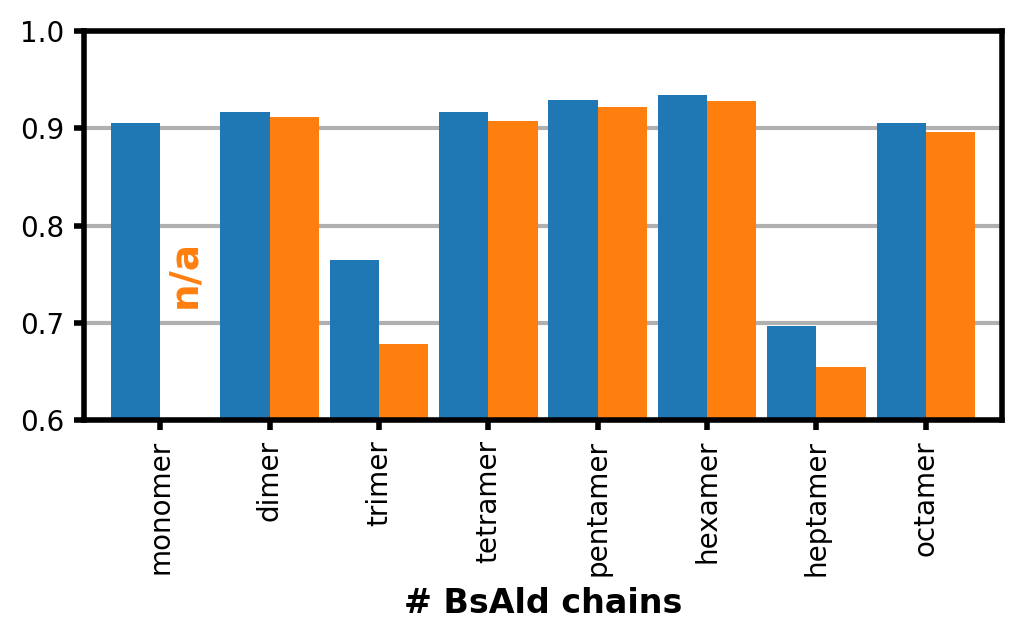

In [3]:
ax = metrics[['pTM','ipTM']].plot.bar(rot = 90, width = 0.9)
fig = plt.gcf()

fig.set_size_inches(5,3)
fig.set_dpi(200)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

ax.yaxis.grid(True, which='major', linewidth = 1.5)

plt.ylim((0.6, 1.0))

ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          ax.patches[8].get_x() + ax.patches[1].get_width() / 2,
          0.75,
          # show n/a when no iptm available.
          str('n/a'),
          # Center the labels and style them a bit.
          ha='center',
          va='center',
          color='tab:orange',
          weight = 'bold',
          rotation=90,
          size=14
    )

ax.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)
ax.get_legend().remove()

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [16]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/ald/Plots"
filename = "ald_pTM_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

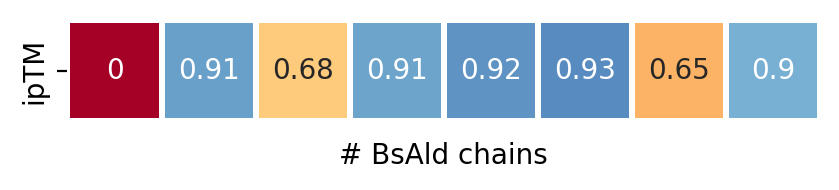

In [13]:
iptm = pd.DataFrame(pd.to_numeric(metrics['ipTM']))

fig, ax = plt.subplots()
fig.set_size_inches(4,.75)
fig.set_dpi(200)

sns.heatmap(iptm.transpose(), annot = True, cbar = False, 
            cmap = 'RdYlBu', vmin = 0.5, vmax = 1.0, linewidth = 2.0)
ax.set_xticks([])
fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [14]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVcouplings mapped on Alphafold complexes/ald/Plots"
filename = "ald_pTM_scores_heatmap"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# Plot the pTM + ipTM (weighted) from all models

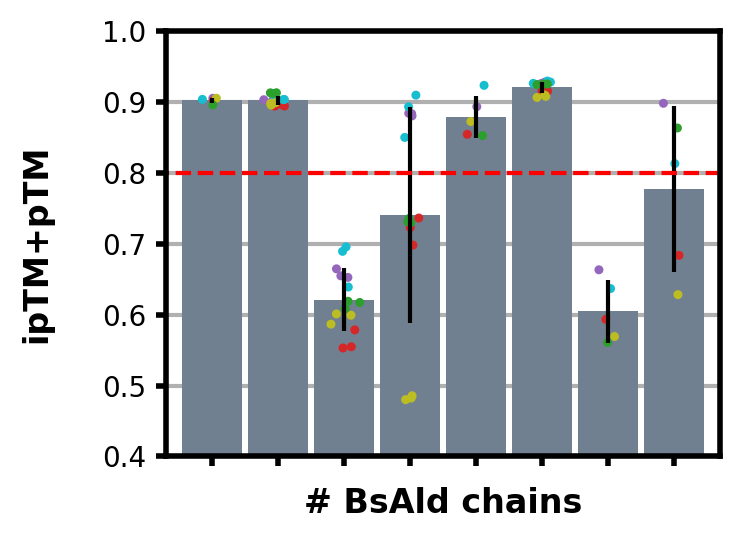

In [26]:
fig, ax = plt.subplots()
#ax.bar(labels, metrics['Highest ipTM+pTM'], width = 0.9, color = "steelblue")
ax = metrics['Average ipTM+pTM'].plot(kind='bar', yerr=metrics['Standard error ipTM+pTM'],
                                 rot = 90, width = 0.9, facecolor = 'slategrey', label='_nolegend_')

col_list_1 = ['tab:purple','tab:red','tab:cyan','tab:olive','tab:green']
col_list_2 = np.repeat(col_list_1,3)
    
fig.set_size_inches(3.5,2.5)
fig.set_dpi(200)

ax.yaxis.grid(True, which='major', linewidth = 1.5)

plt.hlines(0.8,-10,10, linestyle='--', 
           linewidth=1.5, color='red') #plot boundaries for pLDDT

i = 0
for iptm_list in metrics['ipTM+pTM'].tolist():
    pos = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
    displacement = np.random.default_rng().normal(size=len(iptm_list))/10
    
    if len(iptm_list) == 5: # color by model
        col_list = col_list_1
    else:
        col_list = col_list_2
    
    ax.scatter([pos+displacement],iptm_list, s=5, facecolor=col_list)
    i = i+1
    
# hack to add labels to legend
modl = 1
for col in col_list_1:
    ax.scatter(-100,-100, s=5, facecolor=col, label='Model '+str(modl))
    modl = modl + 1

plt.ylabel('ipTM+pTM\n', fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

plt.ylim((0.4, 1.0))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'monomer\n(pTM only)'
#ax.set_xticklabels([])
ax.set_xticklabels(labels)

ax.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8) # using a size in points


fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [ ]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/ald/Plots"
filename = "ald_ipTM+pTM_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# Plot the pLDDT for all residues

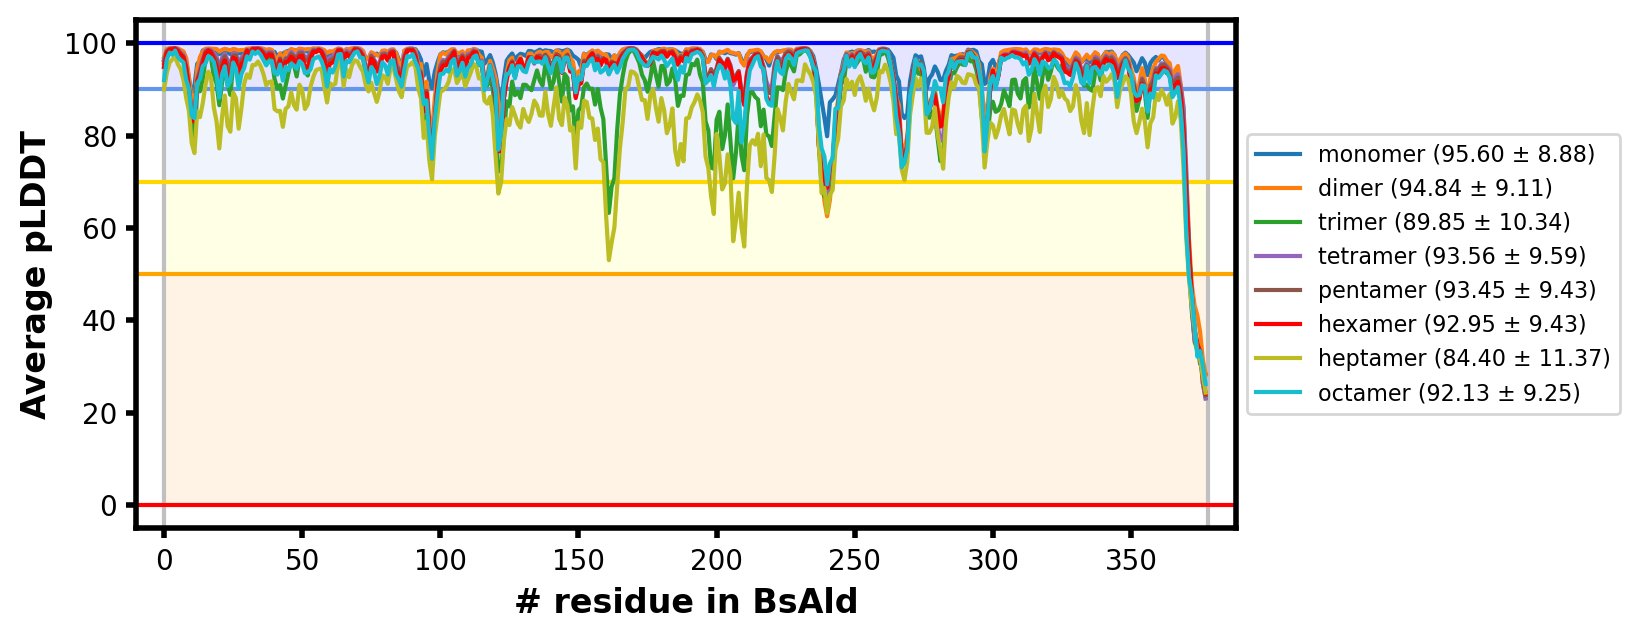

In [5]:
length = 378 #length of protein
number = list(range(1, 8+1)) #make number of ald chains per prediction
colors = plt.cm.tab10(np.linspace(0,1,8))
colors[5] = [1, 0, 0, 1]

fig, ax = plt.subplots()
fig.set_size_inches(8,3)
fig.set_dpi(200)

plt.vlines([0, length],-5,105, linestyle='-', 
           linewidth=1.5, color='silver') #plot boundaries for chains
plt.hlines([0,50,70,90,100],-10,610, linestyle='-', 
           linewidth=1.5, color=['red','orange','gold','cornflowerblue','blue']) #plot boundaries for pLDDT

ax.add_patch(ptch.Rectangle((0,90),length,10, facecolor = 'blue', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,70),length,20, facecolor = 'cornflowerblue', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,50),length,20, facecolor = 'yellow', alpha = 0.1))
ax.add_patch(ptch.Rectangle((0,0),length,50, facecolor = 'darkorange', alpha = 0.1))

idx = 0
for i, row in metrics.iterrows():
    #average pLDTT over all chains
    av_plddt = np.mean(row['pLDDT'])
    std_plddt = np.std(row['pLDDT'])
    plddt_string = f"({av_plddt:.2f} ± {std_plddt:.2f})"
    
    # average over all chains locally by splitting at the end of each chain into new row, average per residue (column-wise)
    split_plddt = np.array_split(row['pLDDT'],number[idx])
    local_av_plddt = np.mean(split_plddt, axis = 0)
    
    # plot line
    ax.plot(range(0,length), local_av_plddt, linewidth=1.5, label = i+' '+plddt_string, color = colors[idx])
    idx = idx+1
    
plt.xlabel('# residue in BsAld', fontweight = 'bold')
plt.ylabel('Average pLDDT', fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

plt.ylim((-5,105))
plt.xlim((-10, length+10))

legend = plt.legend(fontsize = 8, 
                    loc='center left', bbox_to_anchor=(1, 0.5))
plt.gcf().tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [251]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/ald/Plots"
filename = "ald_pLDDT_scores_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# Plot the pLDDT distribution

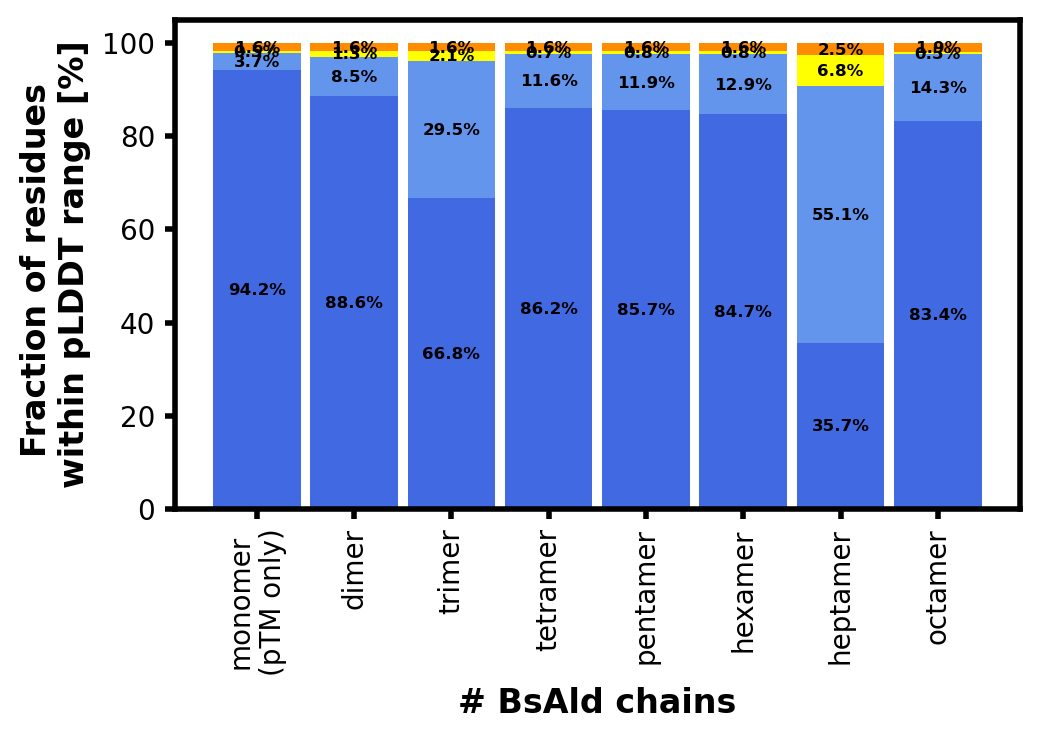

In [6]:
length = 378 #length of protein
number = list(range(1, 8+1)) #make number of ald chains per prediction
colors = plt.cm.tab10(np.linspace(0,1,8))
colors[5] = [1, 0, 0, 1]
width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(5,3.5)
fig.set_dpi(200)


idx = 0
vhigh = np.zeros(8)
high = np.zeros(8)
caution = np.zeros(8)
low = np.zeros(8)

for i, row in metrics.iterrows():
    # get plddt from all chains
    r = np.array(row['pLDDT'])
    
    # get the number of residues with a certain pLDDT
    vhigh[idx]=sum(r>=90)
    high[idx]=sum((r<90) & (r>=70))
    caution[idx]=sum((r<70) & (r>=50))
    low[idx]=sum(r<50)
    
    vhigh[idx] = 100*vhigh[idx]/(length*(idx+1))
    high[idx] = 100*high[idx]/(length*(idx+1))
    caution[idx] = 100*caution[idx]/(length*(idx+1))
    low[idx] = 100*low[idx]/(length*(idx+1))
    idx = idx+1
    
# plot bar charts
ax.bar(labels, vhigh, width = width, color = "royalblue", label = 'pLDDT ≥ 90')
ax.bar(labels, high, bottom = vhigh, width = width, color = "cornflowerblue", label = '70 ≤ pLDDT < 90')
ax.bar(labels, caution, bottom = vhigh+high, width = width, color = "yellow", label = '50 ≤ pLDDT < 70')
ax.bar(labels, low, bottom = vhigh+high+caution, width = width, color = "darkorange", label = 'pLDDT < 50')

for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y()- 1.2,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=6
    )
    
plt.xlabel('# BsAld chains', fontweight = 'bold')
plt.ylabel('Fraction of residues \nwithin pLDDT range [%]', fontweight = 'bold')

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

#legend = plt.legend(fontsize = 8, 
#                    loc='center left', bbox_to_anchor=(1, 0.5))
plt.gcf().tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps
plt.show()

In [172]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/ald/Plots"
filename = "ald_pLDDT_fractions_adjusted"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

# Plot the PAE into a nice little grid

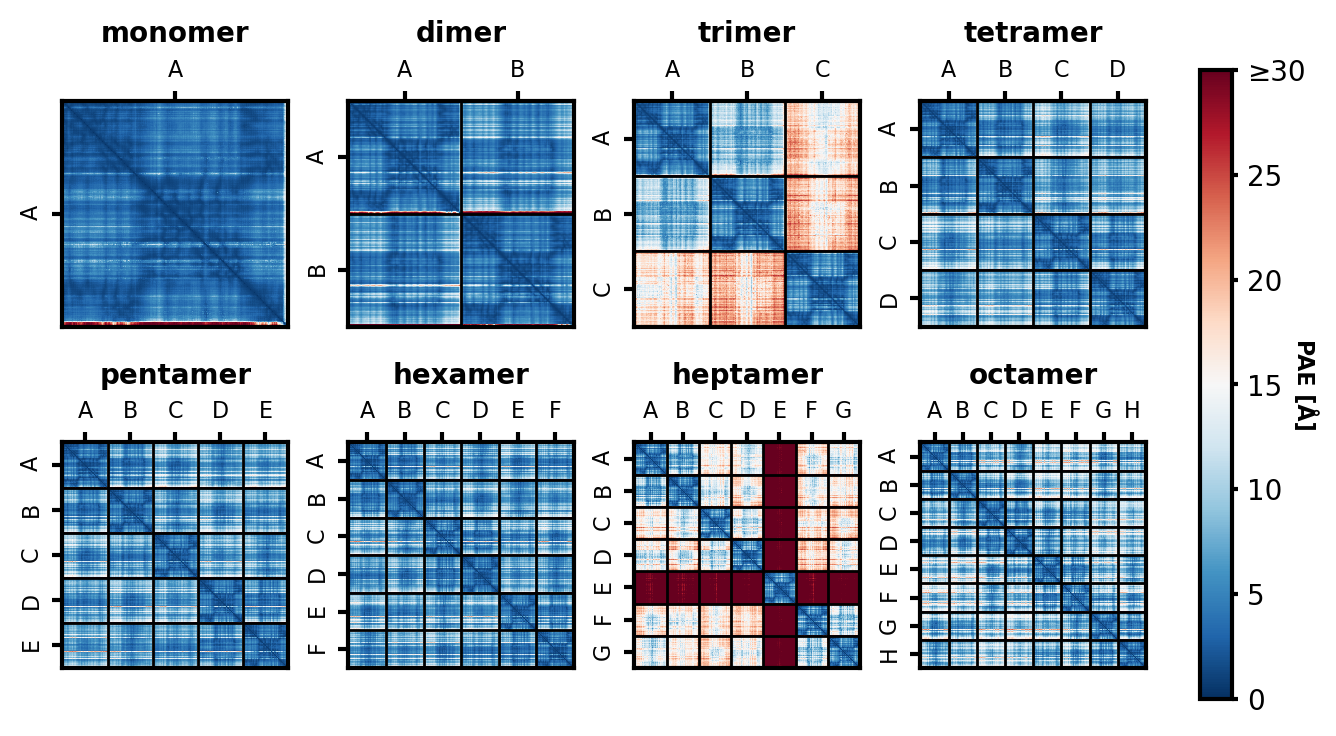

In [7]:
PAE = metrics['PAE']
state = PAE.index.tolist()

length = 378
borders = np.arange(1,9,1)*length # get chain borders of Ald
tick_pos = (np.concatenate((np.zeros(1),borders[:-1])) + borders) / 2 # get middle point between chain borders to put labels
chainnames = list(string.ascii_uppercase) #iterable list of chain IDs

fig, axes = plt.subplots(2,4, constrained_layout=True) #make 2x4 axis grid stored within 2-dimensional array
fig.set_size_inches(6.5,3.5)
fig.set_dpi(200)

i = 0
for idx_ax, ax in np.ndenumerate(axes): # iterate over all axes in array
    ax.set_box_aspect(1) # set to square aspect ratio
    
    mesh = ax.pcolormesh(PAE[i], vmin = 0, vmax = 30, cmap='RdBu_r') #make colored matrix with per-residue PAE color scaling
    
    ax.hlines(borders[0:i], 0, borders[i], colors = 'k', linewidth = 1) # plot borders of Ald chains
    ax.vlines(borders[0:i], 0, borders[i], colors = 'k', linewidth = 1) 
    
    # set axis labels
    ax.xaxis.tick_top() # for clarity, put on top
    ax.xaxis.set_label_position('top') 
    ax.invert_yaxis() # top left needs to map to residue 1<->1, invert
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.tick_params(width=1.5)
    
    ax.set_title(state[i], fontsize = 10, fontweight = 'bold') # set oligomeric state as axis title
    
    # set x/y-ticks to positions between Ald borders, set to respective chain name
    ax.set_xticks(tick_pos[0:i+1], labels = chainnames[0:i+1], fontsize = 8)
    ax.set_yticks(tick_pos[0:i+1], labels = chainnames[0:i+1], fontsize = 8, rotation=90)
    
    i = i + 1 # count up in list

#add colorbar next to subplot grid
cb = fig.colorbar(mesh, ax=axes, orientation='vertical')
cb.outline.set_linewidth(1.5)
cb.ax.tick_params(size = 2, width = 1.5)

#label colorbar
cb.ax.yaxis.set_ticks([0,5,10,15,20,25,30],labels = ['0','5','10','15','20','25','≥30'])
cb.ax.set_ylabel('PAE [Å]', rotation=270, fontsize = 8, fontweight = 'bold')

#padding
fig.set_constrained_layout_pads(w_pad=0./72., h_pad=0./72.,
            hspace=0./72., wspace=4./72.)

plt.show()

In [8]:
# save 
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/ald/Plots"
filename = "ald_PAE_all"
#enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)

# Couplings with increasing multimerization state

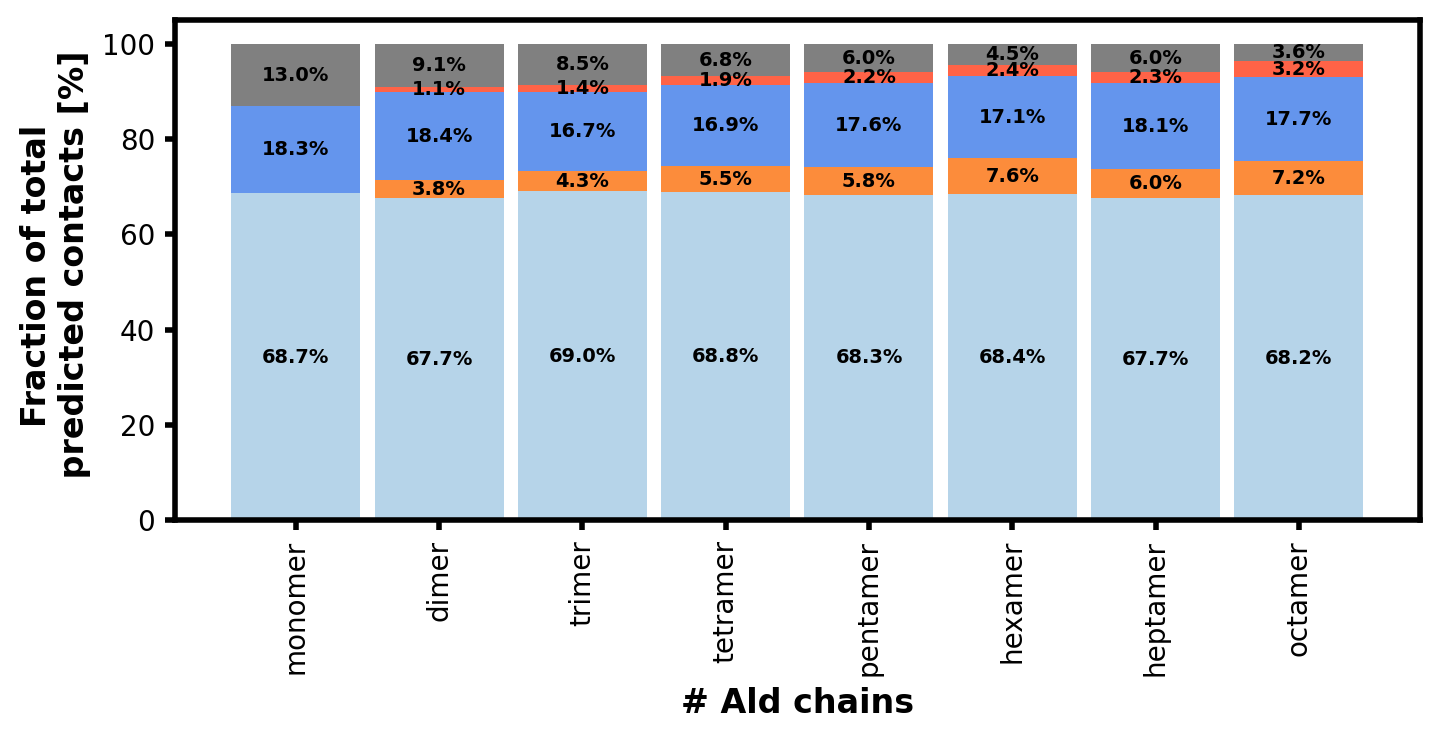

In [4]:
labels = metrics.index.tolist()
#labels.append('holo-MtAld\n(2VHZ)')

numcouplings = np.array([1,2,3,4,5,6,7,8])*552 # there are x chains (expressed as a numpy array for different oligomers), with n total significant couplings
#numcouplings = np.array([1,2,3,4,5,6,7,8,6])*552 # there are x chains (expressed as a numpy array for different oligomers), with n total significant couplings

# manually insert the coupling data and express as percentages relative to total amount of couplings

# order of oligomeric state is indicated by order of numcouplings
intra_close = np.array([379,
                        373+374,
                        384+380+379,
                        380+379+380+381,
                        378+377+376+377+378,
                        379+379+380+377+376+376,
                        376+373+376+370+369+377+375,
                        377*5+376*3,
                        #326*6
                       ])/numcouplings*100
intra_far = np.array([101,
                      102+101,
                      90+91+95,
                      92+96+92+94,
                      95+96+100+96+99,
                      93+93+92+94+97+97,
                      98+97+98+102+108+97+98,
                      97*3+98*3+99*2,
                      #115*6
                     ])/numcouplings*100
inter_close = np.array([0,
                        21+21,
                        29+30+12,
                        32+29+32+29,
                        38+40+19+32+32,
                        42+42+42+43+42+42,
                        40+40+36+38+0+37+39,
                        40+39+40+38+41+38+42+39,
                        #32*6
                       ])/numcouplings*100
inter_far = np.array([0,
                      6+6,
                      9+10+5,
                      11+10+11+10,
                      13+15+11+11+11,
                      13+13+13+13+13+13,
                      12+16+16+17+0+15+14,
                      18+18+18+19+17+19+16+18,
                      #21*6
                     ])/numcouplings*100
unsatisfied = np.array([72,
                        50+50,
                        40+41+60,
                        37+38+37+38,
                        28+24+46+36+32,
                        25+25+25+25+24+24,
                        26+26+26+25+75+26+26,
                        20*8,
                        #58*6
                       ])/numcouplings*100

labellist = ('Intra-chain, <5Å',
             'Homomeric, <5Å',
             'Intra-chain, 5-8Å',
             'Homomeric, 5-8Å',
             '>8Å')

width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(7,3.5)
fig.set_dpi(200)

# make stacked bar plot
ax.bar(labels, intra_close, width = width, color = "#B6D4E9")
ax.bar(labels, inter_close, bottom = intra_close, width = width, color = "#FC8C3B")
ax.bar(labels, intra_far, bottom = intra_close+inter_close, width = width, color = "#6495ED")
ax.bar(labels, inter_far, bottom = intra_close+inter_close+intra_far, width = width, color = "tomato")
ax.bar(labels, unsatisfied, bottom = intra_close+inter_close+intra_far+inter_far, width = width, color = "grey")

# add labels to the patch (https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)
for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y() - 1.2,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=7
    )

ax.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('# Ald chains', fontsize = 12, fontweight = 'bold')
plt.ylabel('Fraction of total \n predicted contacts [%]', fontsize = 12, fontweight = 'bold')
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)
plt.ylim([0, 105])

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [43]:
# save the plot and coupling data
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/ald/Plots"
filename = "ald_coupling_fractions_allchains_adjusted" #enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)

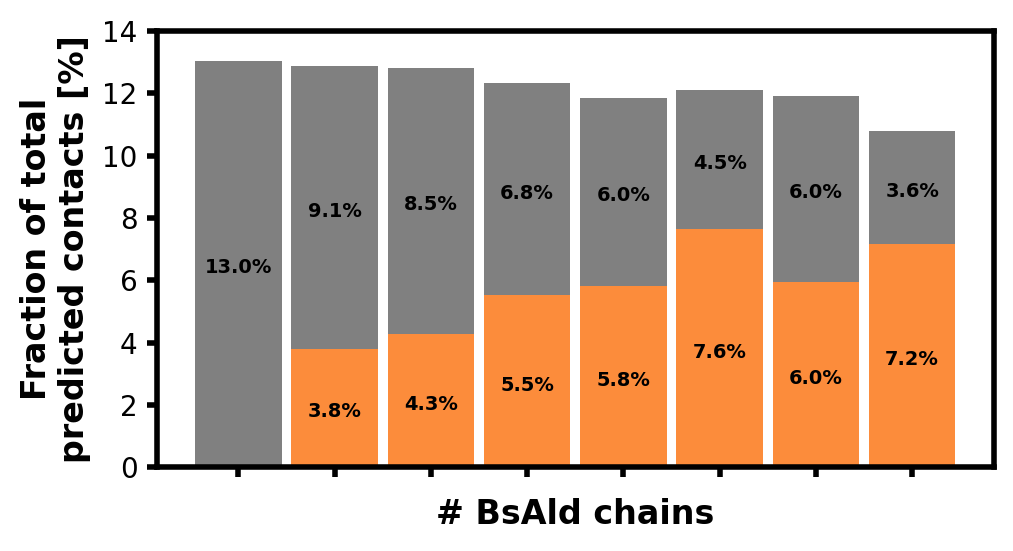

In [7]:
width = 0.9

fig, ax = plt.subplots()
fig.set_size_inches(5,2.5)
fig.set_dpi(200)

# make stacked bar plot
#ax.bar(labels, inter_close, width = width, color = "#FC8C3B")
#ax.bar(labels, inter_far, bottom = inter_close, width = width, color = "tomato")
#ax.bar(labels, unsatisfied, bottom = inter_close+inter_far, width = width, color = "grey")

ax.bar(labels, inter_close, width = width, color = "#FC8C3B")
ax.bar(labels, unsatisfied, bottom = inter_close, width = width, color = "grey")

plt.ylim([0, 14])

# add labels to the patch (https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/)
for bar in ax.patches:
    ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y() - 0.3,
          # This is actual value we'll show.
          str(round(bar.get_height(),1))+'%' if bar.get_height() > 0 else '',
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=7
    )

ax.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('# BsAld chains', fontsize = 12, fontweight = 'bold')
plt.ylabel('Fraction of total\npredicted contacts [%]', fontsize = 12, fontweight = 'bold')
ax.xaxis.label.set_fontweight('bold')
plt.xticks(rotation=90)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
# increase tick width
ax.tick_params(width=2)

ax.set_xticklabels([])

fig.tight_layout(pad = 0, h_pad = 0, w_pad = 0) # tight padding in plot, no big gaps

In [8]:
# save the plot and coupling data
outpath = "S:/3-People/Max/2-Results/Bioinformatics/EVCouplings mapped on Alphafold complexes/ald/Plots"
filename = "ald_coupling_fractions_intermolecular_adjusted" #enter without ending as it will save png and SVG

fileout = outpath+'/'+filename+'.png'
fig.savefig(fileout, bbox_inches='tight', dpi=300)
fileout_svg = outpath+'/SVG/'+filename+'.svg'
fig.savefig(fileout_svg, bbox_inches='tight', dpi=300)